# NLP - COM3029 & COMM061 - Coursework
**Multi-class classifier for  GoEmotions dataset** **bold text**

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 3.9 MB/s eta 0:00:00


## 1. Importing the dataset from Huggingace




In [2]:
from datasets import load_dataset
import pandas as pd

#dataset = load_dataset('go_emotions')
dataset= load_dataset('go_emotions','simplified')


Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

## Get the dataframes

In [3]:
# Loading train, test and validation dataset on to respective dataframes
df_train=pd.DataFrame(dataset['train'])
df_test=pd.DataFrame(dataset['test'])
df_valid=pd.DataFrame(dataset['validation'])

In [4]:
df_train.head(10)

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[27],eczgv1o


## **Data Visualisation**



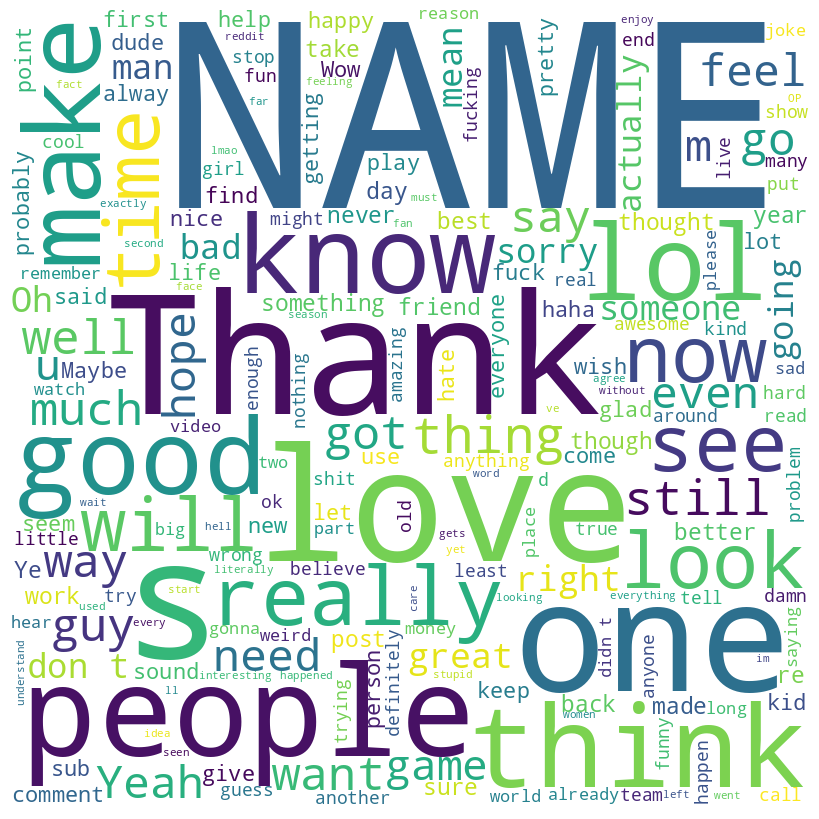

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Creating a Wordcloud to visualise most occured words
dfrm=df_train
# Concatenate all the texts into a single string
text = ' '.join(dfrm['text'].values)

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Visualize the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


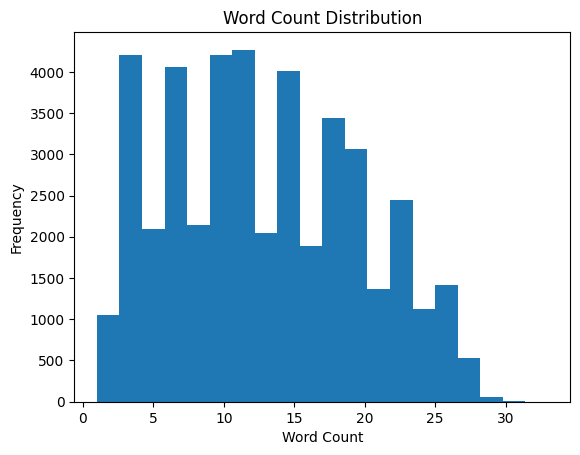

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#creates a new column called word_count that contains the number of words in each text, groups the texts by word count and counts the number of occurrences for each count,
# Create a new column with the word count for each text
df_train1=df_train.copy()
df_train1['word_count'] = df_train1['text'].apply(lambda x: len(x.split()))

# Group the texts by word count and count the number of occurrences
word_count_df = df_train1.groupby(['word_count']).size().reset_index(name='count')

# Visualize the word count distribution as a histogram
plt.hist(word_count_df['word_count'], bins=20, weights=word_count_df['count'])
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.show()



#**Data Pre-processing**


In [7]:
#Dropping unwanted columns from the dataframes
df_train = df_train.drop(['id'], axis=1) 
df_test = df_test.drop(['id'], axis=1)
df_valid = df_valid.drop(['id'], axis=1)

Selected labels:
 1. Surprise, 2. Love, 3. Fear, 4. Joy, 5. Gratitude,
 6. Approval, 7. Disapproval, 8. Confusion,9.  Sadness, 10. Fear, 
 11. Desire,   12. Optimisim, 13. Pride, 14. Neutral

#Dropping the labels other than the above ones.

## Emotion dictionary

In [8]:
emotion_dict = {
    'admiration': 0,
    'amusement': 1,
    'anger': 2,
    'annoyance': 3,
    'approval': 4,
    'caring': 5,
    'confusion': 6,
    'curiosity': 7,
    'desire': 8,
    'disappointment': 9,
    'disapproval': 10,
    'disgust': 11,
    'embarrassment': 12,
    'excitement': 13,
    'fear': 14,
    'gratitude': 15,
    'grief': 16,
    'joy': 17,
    'love': 18,
    'nervousness': 19,
    'optimism': 20,
    'pride': 21,
    'realization': 22,
    'relief': 23,
    'remorse': 24,
    'sadness': 25,
    'surprise': 26,
    'Neutral':27
}


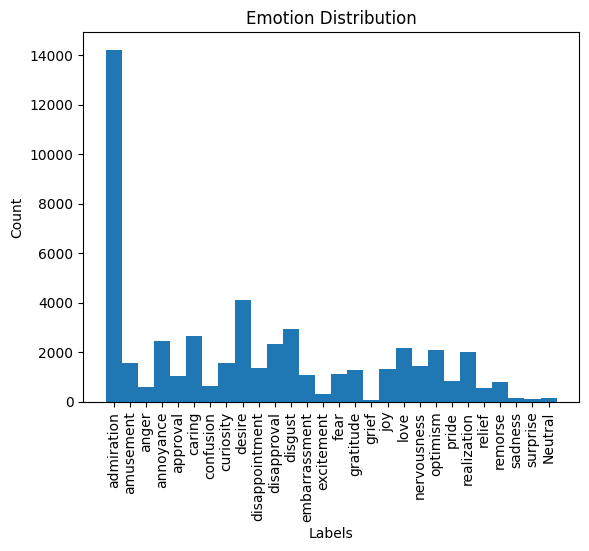

In [9]:
# Visualising emotion distribution in the datset

import collections
import pandas as pd
import matplotlib.pyplot as plt

## Create a frequency distribution of the labels
label_counts = collections.Counter([label for labels in df_train['labels'] for label in labels])

# Plot the label distribution as a bar chart
plt.bar(emotion_dict.keys(), label_counts.values(),width=1)
plt.xticks(rotation=90)
plt.title('Emotion Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()



## Defining Functions to preprocess the data

In [10]:
labels_to_drop = [0, 1, 2, 3, 5, 7,9, 11, 12, 13, 16, 19, 23, 24]
df_train = df_train[~df_train['labels'].apply(lambda x: any(label in labels_to_drop for label in x))]
df_valid = df_valid[~df_valid['labels'].apply(lambda x: any(label in labels_to_drop for label in x))]
df_test = df_test[~df_test['labels'].apply(lambda x: any(label in labels_to_drop for label in x))]

    

In [11]:
df_train.head(10)

,text,labels
0,My favourite food is anything I didn't have to...,[27]
1,"Now if he does off himself, everyone will thin...",[27]
3,To make her feel threatened,[14]
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26]
6,Yes I heard abt the f bombs! That has to be wh...,[15]
7,We need more boards and to create a bit more s...,"[8, 20]"
9,It might be linked to the trust factor of your...,[27]
10,Demographics? I don’t know anybody under 35 wh...,[6]
12,Hello everyone. Im from Toronto as well. Can c...,[27]
16,Thank you friend,[15]


In [12]:
# Function to drop unwanted labels

def droplabel(type_data):
    labels_to_drop = [0, 1, 2, 3, 5, 7,9, 11, 12, 13, 16, 19, 23, 24]
    type_data = type_data[~type_data['labels'].apply(lambda x: any(label in labels_to_drop for label in x))]
    return type_data
    

In [13]:
#Function to handle multiple labels
#If there are multiple labels, we're taking the mode of the labels to get a single label

import pandas as pd
from collections import Counter

def handlemultiplelabels(type_data):
    # Split the labels by comma and convert them to integers
    type_data['labels'] = type_data['labels'].fillna('').apply(lambda x: eval(x) if isinstance(x, str) else x).apply(lambda x: [int(i) for i in x])

    # Replace rows with multiple labels with a single label
    multi_label_rows = type_data[type_data['labels'].apply(len) > 1]
    for index, row in multi_label_rows.iterrows():
        label_counts = Counter(row['labels'])
        mode_label = label_counts.most_common(1)[0][0]
        type_data.at[index, 'labels'] = [mode_label]

    return type_data


In [14]:
# Mapping the labels to respective emotions 
old_dict={26:'Surprise', 18:' Love', 14:'Fear', 17:'Joy', 15:'Gratitude', 4:'Approval', 10:'Disapproval',
          6:'Confusion', 25:'Sadness', 22: 'Realise', 8: 'Desire', 20: 'Optimism', 21:'Pride', 27:'Neutral'}

# Create a new dictionary to map the labels from 0-27 to 0-13
new_dict = {i: old_dict[k] for i, k in enumerate(old_dict)}

#Converting labels to interger values
def labeltoint(type_data):
    type_data['labels'] = type_data['labels'].apply(lambda x: int(x[0]))
    return type_data


new_dict={0:'Surprise', 1:' Love', 2:'Fear', 3:'Joy', 4:'Gratitude', 5:'Approval', 6:'Disapproval',
          7:'Confusion', 8:'Sadness', 9: 'Realise', 10: 'Desire', 11: 'Optimism', 12:'Pride', 13:'Neutral'}

In [15]:
# Function to map emotions from the old labels to new labels

def maplabels(type_data):
    # Create a dictionary mapping old labels to new labels
    label_map = dict(zip(old_dict.keys(), [int(x) for x in new_dict.keys()]))

    # Map the old labels to the new labels
    type_data['labels'] = type_data['labels'].map(label_map)
    return type_data

In [16]:
# Define a function to convert all the strings to lowercase

def tolowercase(type_data):
        #convert characters to lowercase
        type_data['text']=type_data['text'].str.lower()
        return type_data
      

In [17]:
#Define a function to remove stop words

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(type_data): #def remove_stopwords(df, column)
    stop_words = set(stopwords.words('english'))
    type_data['text'] = type_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return type_data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
#Define a function to remove numbers, special characters from the text

def remove_specialcharsnum(type_data):
    type_data['text'] = type_data['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
    return type_data

In [19]:
 #Define a function to perform Tokenisation
 
from nltk.tokenize import word_tokenize
import spacy
nlp = spacy.load('en_core_web_sm')

# datafrm_train['text'] = datafrm_train['text'].apply(lambda x: nltk.word_tokenize(x))
def Tokenisation(type_data):
    type_data['text'] = type_data['text'].apply(lambda x: word_tokenize(x))
    return type_data



In [20]:
# Create a frequency distribution of the tokens

def freq_dist(type_data):
    freq_dist = nltk.FreqDist([token for tokens in type_data['text'] for token in tokens])

    #counts the frequency of each word in the document and returns it a dictionary format.
    term_freq_df = pd.DataFrame.from_dict(freq_dist, orient='index', columns=['frequency'])
    term_freq_dict = freq_dist.items()
    return term_freq_dict



In [21]:
# Define a function to perform lemmatization using spacy

import spacy

def lemmatization(type_data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # Load the Spacy language model
    nlp = spacy.load('en_core_web_sm')
    
    # Define the lemmatization function
    def lemmatize_text(text):
        doc = nlp(text)
        return ' '.join([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    # Apply the lemmatization function to the 'text' column
    type_data['text'] = type_data['text'].apply(lemmatize_text)
    
    # Return the modified dataframe
    return type_data


In [22]:
#Define a function to remove emojis

import pandas as pd
import re

def remove_emojis(type_data):
# Define a regular expression pattern that matches emojis
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"  # dingbats
            u"\U000024C2-\U0001F251" 
                              "]+", flags=re.UNICODE)

    # Remove emojis from the 'text' column
    type_data['text'] = type_data['text'].apply(lambda x: emoji_pattern.sub(r'', x))
    return type_data


In [23]:
#Define a function to reomve some label samples of 13 [NEUTRAL] 

def removelabelsamples(type_data,num_rows_to_keep):
    import pandas as pd
    label_value = 13

    label_rows = type_data[type_data['labels'] == label_value]
    num_rows = len(label_rows)

    if num_rows > num_rows_to_keep:
        rows_to_keep = label_rows.sample(n=num_rows_to_keep)
        type_data = pd.concat([type_data[type_data['labels'] != label_value], rows_to_keep])
    
    print(type_data.shape)
    return type_data

In [24]:
#Define a function to create word embeddings
#  Using Glove for word embedding

from sklearn.feature_extraction.text import CountVectorizer
import gensim.downloader as api
import numpy as np
def wordembedding(type_data):
    # concatenate the tokens in each list into a single string
    type_data['text'] = type_data['text'].apply(lambda tokens: ' '.join(tokens))

    # loading the pre-trained GloVe model
    model = api.load('glove-wiki-gigaword-300')


    # get the vector representation for each token that is in the GloVe vocabulary
    token_vectors = [model.get_vector(token) for token in type_data['text'] if token in model.key_to_index]
    # create an empty list to store the document vectors
    doc_vectors = []

    # compute the document vector for each row and append it to the list
    for text in type_data['text']:
        # get the vector representation for each token that is in the GloVe vocabulary
        token_vectors = [model.get_vector(token) for token in text.split() if token in model.key_to_index]
        
        # get the document vector by averaging the token vectors
        doc_vector = np.mean(token_vectors, axis=0)
        
        # append the document vector to the list
        doc_vectors.append(doc_vector)

    # add the list of document vectors to the DataFrame
    type_data['doc_vector'] = doc_vectors
    return type_data


## Original data duplication(without id and dropped label)

In [25]:
train_data_orig = df_train.copy()
valid_data_orig = df_valid.copy()
test_data_orig = df_test.copy()  
#DO NOT TOUCH THE ORIGINAL DATASET

In [26]:
train_data_orig.head(10)

,text,labels
0,My favourite food is anything I didn't have to...,[27]
1,"Now if he does off himself, everyone will thin...",[27]
3,To make her feel threatened,[14]
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26]
6,Yes I heard abt the f bombs! That has to be wh...,[15]
7,We need more boards and to create a bit more s...,"[8, 20]"
9,It might be linked to the trust factor of your...,[27]
10,Demographics? I don’t know anybody under 35 wh...,[6]
12,Hello everyone. Im from Toronto as well. Can c...,[27]
16,Thank you friend,[15]


# **EXPERIMENT 1 : Data Pre-processing**
#    Lemmatization+ removing stopwords+ Remove special characters, emojis, tokenisation

In [27]:
def preprocessing(type_data):
    #df=droplabel(type_data)
    df=handlemultiplelabels(type_data)
    df=labeltoint(df)
    df=maplabels(df)
    df=tolowercase(df)
    df=remove_stopwords(df)
    df=remove_specialcharsnum(df)
    df=remove_emojis(df)
    df=lemmatization(df) 
    df=Tokenisation(df)
    return df
   

calling the pre-processing function and word-embedding function

In [28]:
df_train = preprocessing(df_train)
df_test = preprocessing(df_test)
df_valid =  preprocessing(df_valid)  



## DATA AFTER PRE-PROCESSING TECHNIQUE 1

In [29]:
df_train1=df_train.copy()
df_valid1=df_valid.copy()
df_test1=df_test.copy()

In [30]:
df_train.head(10)

,text,labels
0,"[favourite, food, cook]",13
1,"[think, s, laugh, screw, people, instead, actu...",13
3,"[make, feel, threatened]",2
5,"[omg, peyton, good, enough, help, playoff, circa]",0
6,"[hear, bomb, thank, reply, hubby, anxiously, w...",4
7,"[need, board, create, bit, space, name, well, ...",10
9,"[link, trust, factor, friend]",13
10,"[demographic, know, cable, tv]",7
12,"[m, well, call, visit, personal, need]",13
16,"[thank, friend]",4


## Perform word embedding using GloVe

In [31]:
df_train=wordembedding(df_train)
df_valid=wordembedding(df_valid)
df_test=wordembedding(df_test)

[=================================================-] 99.8% 375.4/376.1MB downloaded


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Dataset duplication after embedding(Glove)

In [32]:
df_trainem1=df_train.copy()
df_validem1=df_train.copy()
df_testem1=df_test.copy()

In [33]:
df_train.head(10)

,text,labels,doc_vector
0,favourite food cook,13,"[0.36594334, 0.18925333, 0.3687, -0.08885, 0.1..."
1,think s laugh screw people instead actually dead,13,"[-0.112972006, 0.14429489, -0.02210788, -0.075..."
3,make feel threatened,2,"[0.18123333, 0.23613334, -0.17807698, -0.21941..."
5,omg peyton good enough help playoff circa,0,"[-0.12995985, 0.12699516, -0.04547014, -0.0579..."
6,hear bomb thank reply hubby anxiously wait,4,"[-0.064123146, -0.21304572, 0.033010412, -0.18..."
7,need board create bit space name well good,10,"[-0.10330525, -0.110647, -0.048960477, -0.2318..."
9,link trust factor friend,13,"[-0.200791, 0.048263997, -0.01372835, -0.27658..."
10,demographic know cable tv,7,"[-0.101216495, 0.11308501, 0.30084202, 0.09771..."
12,m well call visit personal need,13,"[-0.09004433, 0.18339215, -0.21431468, -0.1306..."
16,thank friend,4,"[-0.1488605, -0.12451799, -0.14121851, -0.4456..."


## Pie-chart to visualise frequency of labels after pre-processing the data

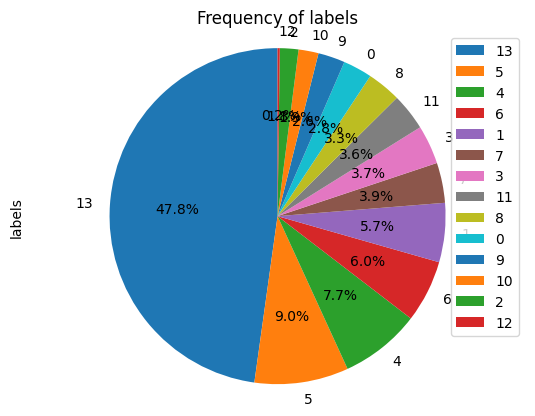

In [34]:
#Data Visualisation using Pie-chart to observe frequency distribution of labels

import pandas as pd
import matplotlib.pyplot as plt

# count the frequency of each label
label_counts = df_train['labels'].value_counts()
# plot the frequency counts as a pie chart
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend()
plt.title('Frequency of labels')
plt.show() 

## Remove some neutral labels from the dataset

In [35]:
df_train=removelabelsamples(df_train,3000)
df_train


(17007, 3)


,text,labels,doc_vector
3,make feel threatened,2,"[0.18123333, 0.23613334, -0.17807698, -0.21941..."
5,omg peyton good enough help playoff circa,0,"[-0.12995985, 0.12699516, -0.04547014, -0.0579..."
6,hear bomb thank reply hubby anxiously wait,4,"[-0.064123146, -0.21304572, 0.033010412, -0.18..."
7,need board create bit space name well good,10,"[-0.10330525, -0.110647, -0.048960477, -0.2318..."
10,demographic know cable tv,7,"[-0.101216495, 0.11308501, 0.30084202, 0.09771..."
...,...,...,...
15325,sound want do regardless doctor,13,"[-0.013335342, 0.08644579, -0.21072778, 0.0515..."
25709,mean feel people lose drastically other,13,"[-0.042983163, 0.10087033, -0.020150166, 0.114..."
15514,huge pic name name wedding loom dysfunction,13,"[-0.10494904, 0.13765386, 0.1843666, -0.176602..."
41083,think make distinction lus,13,"[0.15628874, 0.1833375, -0.074769504, 0.219105..."


In [36]:
df_valid=removelabelsamples(df_valid,400)
df_valid



(2212, 3)


,text,labels,doc_vector
1,know answer man program capture code send avoid,5,"[-0.27166876, 0.023149313, 0.05670825, -0.0979..."
2,ve never sad life,8,"[0.028521746, 0.043291003, -0.071284756, -0.18..."
3,economy heavily control subsidized government ...,5,"[0.09541097, -0.07745027, -0.097883366, 0.0332..."
4,easily take real camera legitimate source chan...,11,"[-0.22522044, 0.24910556, 0.12315951, -0.01086..."
5,thank vote confidence statistically get win,4,"[0.13949983, 0.26026195, 0.02356051, -0.043861..."
...,...,...,...
2253,insane,13,"[0.37762, 0.032648, 0.038613, 0.48112, 0.67255..."
110,get robot explanation,13,"[-0.25307, -0.14786999, 0.045376662, -0.186561..."
1579,year go name master capable training other,13,"[-0.18346357, 0.16150615, 0.11806773, -0.06459..."
3437,join wrong org,13,"[0.019564994, -0.016989999, -0.008914068, -0.0..."


In [37]:
#df_test=removelabelsamples(df_test,3000)
#df_test



## Dropping the null values from the dataset

In [38]:
# Dropping the null values from the dataset

df_train.dropna(inplace=True) 
df_valid.dropna(inplace=True)
df_test.dropna(inplace=True)

In [39]:
print(df_train['doc_vector'].isnull().sum())

0


## **Training the dataset using SVM**

In [40]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

def SVM():
    # convert doc_vector column to matrix
    X_train = np.vstack(df_train['doc_vector'].values)
    X_valid = np.vstack(df_valid['doc_vector'].values)
    X_test = np.vstack(df_test['doc_vector'].values)

    # extract labels
    y_train = df_train['labels'].values
    y_valid = df_valid['labels'].values
    y_test = df_test['labels'].values

    # train an SVM model on the preprocessed training data
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # evaluate the trained model on the validation set
    y_pred = svm.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print('Validation accuracy:', acc)

    # evaluate the trained model on the test set
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Test accuracy:', acc)
    return svm

In [41]:
# define a function to get the document vector for your own text data
def get_doc_vector(text):
    # loading the pre-trained GloVe model
    model = api.load('glove-wiki-gigaword-300')
    # get the vector representation for each token that is in the GloVe vocabulary
    token_vectors = [model.get_vector(token) for token in text.split() if token in model.key_to_index]
    
    # get the document vector by averaging the token vectors
    doc_vector = np.mean(token_vectors, axis=0)
    
    return doc_vector


In [42]:
# Testing the model with  my unseen data

def test(model):
    svm = model
    own_text = "i am sad"
    doc_vector = get_doc_vector(own_text)

    # predict the emotion label using the trained SVM model
    emotion_label = svm.predict(doc_vector.reshape(1, -1))[0] # reshape doc_vector to a 2D array to match the shape of X_train

    print("The predicted emotion label for your text is:", new_dict[emotion_label])

In [43]:
model = SVM()
test(model)


Validation accuracy: 0.4606227106227106
Test accuracy: 0.49547374773687386
The predicted emotion label for your text is: Sadness


## ACCURACY OF SVM
   

1.  Validation accuracy = 46%
2.   Training accuracy = 49%



In [44]:
# Verifying the model with test dataset

svm=model
# convert the list of arrays to a 2D NumPy array
X_test = np.stack(df_test['doc_vector'].values)

# make predictions on the test data
y_pred = svm.predict(X_test)

# save the predictions to a file
np.savetxt('predictions.csv', y_pred, delimiter=',')


In [45]:
#check the result
#Observing the results after prediction
# compare true labels with y_pred_labels
 
#Verifying the results on test dataset
import numpy as np

# read the contents of predictions.csv
predictions = np.genfromtxt('predictions.csv', delimiter=',')

# Merge the predictions with the original test data using the index as the key
df_results = pd.concat([df_test['text'], pd.Series(y_pred, name='label')], axis=1)
  
df_results = df_test.copy()
df_results= df_results.drop('doc_vector', axis=1)

# replace labels in df_test with predicted labels
df_results['y_pred_labels'] = y_pred
print(df_results.head(30))
    

                                                 text  labels  y_pred_labels
0                       m really sorry situation love       8              8
3                                    know teach today       4              4
4   get bored haunt earth thousand year ultimately...      13             13
5   thank ask question recognize thing know unders...       4              4
6                                          re welcome       4              4
7                                     congrat job too       4             13
9                       girlfriend weak jump pathetic       8              8
12                            translation wish afford      10             10
14              also hear intriguing also kinda scary       2              2
15  never want punch osap hard see however hardly ...       6             13
16                    think shoot asylum seeker appal       2             13
17                         pain go away hour so break       8              8

## Classification Report

In [46]:
from sklearn.metrics import classification_report

# get the true labels for the test data
y_true = df_test['labels']

# print the classification report
print(classification_report(y_true, y_pred))

#This will print a report with precision, recall, f1-score, and support for each class in the target variable.

              precision    recall  f1-score   support

           0       0.30      0.29      0.30        90
           1       0.53      0.76      0.63       161
           2       0.46      0.46      0.46        69
           3       0.35      0.46      0.40       114
           4       0.80      0.82      0.81       287
           5       0.19      0.40      0.26       294
           6       0.24      0.18      0.21       210
           7       0.17      0.07      0.10       115
           8       0.45      0.49      0.47       103
           9       0.00      0.00      0.00       109
          10       0.31      0.15      0.20        68
          11       0.40      0.38      0.39       116
          12       0.67      0.25      0.36         8
          13       0.65      0.58      0.61      1570

    accuracy                           0.50      3314
   macro avg       0.39      0.38      0.37      3314
weighted avg       0.51      0.50      0.49      3314



## Confusion Matrix

In [47]:
y_test = df_test['labels'].values

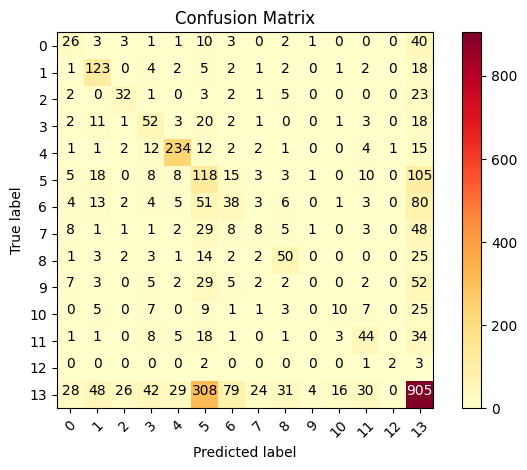

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true, y_pred)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
thresh = cm.max() / 2.0

plt.imshow(cm, cmap=plt.cm.YlOrRd, interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## Variation in EXPERIMENT 1: Stemming and without removing stopwords

In [49]:
df_train=train_data_orig.copy()
df_valid=valid_data_orig.copy()
df_test= test_data_orig.copy()  
#DO NOT TOUCH THE ORIGINAL DATASET

In [50]:
#Trying with stemming and without removing stop-words

#Define a function to perform stemming using PorterStemmer

import pandas as pd
from nltk.stem import PorterStemmer
def stemming(type_data):
    # Initialize a stemmer
    stemmer = PorterStemmer()

    # Apply stemming to the 'text' column using a lambda function
    type_data['text'] = type_data['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    return type_data
  


    return df

In [51]:
df_train.head(10)


,text,labels
0,My favourite food is anything I didn't have to...,[27]
1,"Now if he does off himself, everyone will thin...",[27]
3,To make her feel threatened,[14]
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26]
6,Yes I heard abt the f bombs! That has to be wh...,[15]
7,We need more boards and to create a bit more s...,"[8, 20]"
9,It might be linked to the trust factor of your...,[27]
10,Demographics? I don’t know anybody under 35 wh...,[6]
12,Hello everyone. Im from Toronto as well. Can c...,[27]
16,Thank you friend,[15]


In [52]:
def preprocessing(type_data):
    #df=droplabel(type_data)
    df=handlemultiplelabels(type_data)
    df=labeltoint(df)
    df=maplabels(df)
    df=tolowercase(df)
    df=remove_specialcharsnum(df)
    df=remove_emojis(df)
    df=stemming(df) # stemming
    df=Tokenisation(df)
    

    return df

In [53]:
df_train=preprocessing(df_train)
df_valid=preprocessing(df_valid)
df_test=preprocessing(df_test)

In [54]:
df_train.head(10)

,text,labels
0,"[my, favourit, food, is, anyth, i, didnt, have...",13
1,"[now, if, he, doe, off, himself, everyon, will...",13
3,"[to, make, her, feel, threaten]",2
5,"[omg, peyton, isnt, good, enough, to, help, us...",0
6,"[ye, i, heard, abt, the, f, bomb, that, ha, to...",4
7,"[we, need, more, board, and, to, creat, a, bit...",10
9,"[it, might, be, link, to, the, trust, factor, ...",13
10,"[demograph, i, dont, know, anybodi, under, who...",7
12,"[hello, everyon, im, from, toronto, as, well, ...",13
16,"[thank, you, friend]",4


## Data after pre-processing technique 2

In [55]:
df_train2=df_train.copy()
df_valid2=df_valid.copy()
df_test2=df_test.copy()

## Pre-processing technique 2 + GloVe embedding

In [56]:
df_train= wordembedding(df_train)
df_test=wordembedding(df_test)
df_valid= wordembedding(df_valid)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [57]:
## Removing some neutral label samples 
df_train=removelabelsamples(df_train,3000)
df_valid=removelabelsamples(df_valid,400)


(17007, 3)
(2212, 3)


In [58]:
# Dropping the null values from the dataset

df_train.dropna(inplace=True) 
df_valid.dropna(inplace=True)
df_test.dropna(inplace=True)

## Pre-processed data after doing variation 2 ( dropped null values, removed label samples)

In [59]:
train_wd=df_train.copy()
valid_wd=df_valid.copy()
test_wd=df_test.copy()

In [60]:
train_wd.head(10)

,text,labels,doc_vector
3,to make her feel threaten,2,"[-0.018442404, 0.1159202, -0.36968222, -0.2765..."
5,omg peyton isnt good enough to help us in the ...,0,"[-0.0755232, 0.14430313, -0.1358438, -0.100735..."
6,ye i heard abt the f bomb that ha to be whi th...,4,"[-0.10028123, 0.030625658, -0.13151038, -0.205..."
7,we need more board and to creat a bit more spa...,10,"[-0.19019182, 0.0022973474, -0.048756514, -0.2..."
10,demograph i dont know anybodi under who ha cab...,7,"[-0.32413742, 0.009428574, -0.012045143, 0.090..."
16,thank you friend,4,"[-0.19399698, -0.067019664, -0.14435233, -0.29..."
19,mayb that what happen to the great white at ho...,7,"[0.016071593, 0.16011031, -0.111054525, -0.108..."
28,super thank,4,"[-0.045185503, 0.45704502, 0.1171965, -0.32305..."
31,all sound possibl except the key i cant see ho...,7,"[-0.11225088, 0.073751256, -0.1441322, -0.1621..."
34,what doe fptp have to do with the referendum,7,"[-0.090088435, 0.157253, -0.16659781, 0.003244..."


In [61]:
#TRAINING THE SVM

model = SVM()
test(model)

Validation accuracy: 0.47442281575373474
Test accuracy: 0.5139548693586699
The predicted emotion label for your text is: Sadness


Accuracy of SVM with Variation 
Validation accuracy = 47.5%
Test accuracy = 51.7%

# **RESULT: The accuracy is slightly improved with Variation  in EXPERIMENT 1**

In [62]:
# Verifying the model with test dataset

svm=model
# convert the list of arrays to a 2D NumPy array
X_test = np.stack(df_test['doc_vector'].values)

# make predictions on the test data
y_pred = svm.predict(X_test)

# save the predictions to a file
np.savetxt('predictions.csv', y_pred, delimiter=',')

In [63]:
#check the result
#Observing the results after prediction
# compare true labels with y_pred_labels
 
#Verifying the results on test dataset
import numpy as np

# read the contents of predictions.csv
predictions = np.genfromtxt('predictions.csv', delimiter=',')

# Merge the predictions with the original test data using the index as the key
df_results = pd.concat([df_test['text'], pd.Series(y_pred, name='label')], axis=1)
  
df_results = df_test.copy()
df_results= df_results.drop('doc_vector', axis=1)

# replace labels in df_test with predicted labels
df_results['y_pred_labels'] = y_pred
print(df_results.head(30))

                                                 text  labels  y_pred_labels
0   im realli sorri about your situat although i l...       8              1
3   i didnt know that thank you for teach me somet...       4              4
4   they got bore from haunt earth for thousand of...      13             13
5   thank you for ask question and recogn that the...       4              4
6                                         your welcom       4              4
7                             congrat on your job too       4             13
9         girlfriend weak as well that jump wa pathet       8             13
12                  translat i wish i could afford it      10             10
14   ive also heard that intrigu but also kinda scari       2              5
15  i never want to punch osap harder after see th...       6             13
16  the thought of shoot anyth at asylum seeker is...       2              5
17  if the pain doesnt go away after hour or so it...       8             13

## **Classification Report**

In [64]:
from sklearn.metrics import classification_report

# get the true labels for the test data
y_true = df_test['labels']

# print the classification report
print(classification_report(y_true, y_pred))

#This will print a report with precision, recall, f1-score, and support for each class in the target variable.

              precision    recall  f1-score   support

           0       0.19      0.18      0.19        92
           1       0.65      0.81      0.72       168
           2       0.58      0.21      0.31        71
           3       0.41      0.44      0.42       114
           4       0.81      0.84      0.83       288
           5       0.22      0.39      0.28       295
           6       0.25      0.35      0.29       215
           7       0.33      0.25      0.28       116
           8       0.43      0.38      0.40       108
           9       0.00      0.00      0.00       109
          10       0.25      0.13      0.17        68
          11       0.45      0.41      0.43       116
          12       0.50      0.12      0.20         8
          13       0.65      0.60      0.62      1600

    accuracy                           0.51      3368
   macro avg       0.41      0.37      0.37      3368
weighted avg       0.52      0.51      0.51      3368



## Confusion Matrix




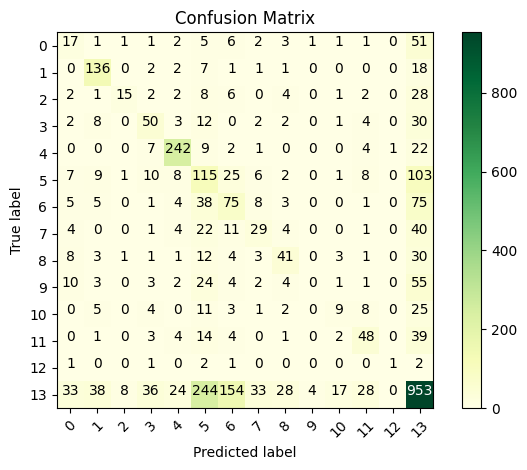

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, cmap=plt.cm.YlGn, interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



# **EXPERIMENT 2: Using LSTM instead of SVM**

In [66]:
## Copying the pre-processed data from technique 2
df_train =   train_wd.copy()
df_valid = valid_wd.copy()
df_test = test_wd.copy()

In [67]:
df_train.head(10)

,text,labels,doc_vector
3,to make her feel threaten,2,"[-0.018442404, 0.1159202, -0.36968222, -0.2765..."
5,omg peyton isnt good enough to help us in the ...,0,"[-0.0755232, 0.14430313, -0.1358438, -0.100735..."
6,ye i heard abt the f bomb that ha to be whi th...,4,"[-0.10028123, 0.030625658, -0.13151038, -0.205..."
7,we need more board and to creat a bit more spa...,10,"[-0.19019182, 0.0022973474, -0.048756514, -0.2..."
10,demograph i dont know anybodi under who ha cab...,7,"[-0.32413742, 0.009428574, -0.012045143, 0.090..."
16,thank you friend,4,"[-0.19399698, -0.067019664, -0.14435233, -0.29..."
19,mayb that what happen to the great white at ho...,7,"[0.016071593, 0.16011031, -0.111054525, -0.108..."
28,super thank,4,"[-0.045185503, 0.45704502, 0.1171965, -0.32305..."
31,all sound possibl except the key i cant see ho...,7,"[-0.11225088, 0.073751256, -0.1441322, -0.1621..."
34,what doe fptp have to do with the referendum,7,"[-0.090088435, 0.157253, -0.16659781, 0.003244..."


In [68]:
# loading the pre-trained GloVe model

Gmodel = api.load('glove-wiki-gigaword-300')

In [69]:
print(df_train['doc_vector'].isnull().sum())

0


In [70]:
##Gmodel = model

## Convert doc_vector to list

In [71]:
doc_vector_train = np.array(df_train['doc_vector'].to_list())
doc_vector_test = np.array(df_test['doc_vector'].to_list())
doc_vector_val= np.array(df_valid['doc_vector'].to_list())

In [72]:
doc_vector_train.shape

(16991, 300)

In [73]:
labels_train = np.array(df_train['labels'])
labels_test = np.array(df_test['labels'])
labels_val = np.array(df_valid['labels'])

In [74]:
#doc_vector_train = np.expand_dims(doc_vector_train, axis=1)
#doc_vector_val = np.expand_dims(doc_vector_val, axis=1)
#doc_vector_test = np.expand_dims(doc_vector_test, axis=1)

In [75]:
doc_vector_train = doc_vector_train.reshape(-1, 1, 300)
doc_vector_val = doc_vector_val.reshape(-1, 1, 300)
doc_vector_test = doc_vector_test.reshape(-1, 1, 300)

In [76]:
doc_vector_train.shape

(16991, 1, 300)

In [77]:
labels_train.shape

(16991,)

##  Building the model- LSTM




In [78]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout

# Define the model architecture
model = Sequential()
#model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
model.add(LSTM(units=64, return_sequences=True, input_shape=(1,300)))   
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=14, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(doc_vector_train, labels_train, epochs=20, batch_size=128, validation_data=(doc_vector_val, labels_val))

# Display the training accuracy for each epoch
train_acc = history.history['accuracy']
last_train_acc = train_acc[-1]
print("Training accuracy after the last epoch = {:.2f}%".format(last_train_acc*100))


# Evaluate the model on the test set
loss, accuracy = model.evaluate(doc_vector_test, labels_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy*100)


Epoch 1/20
133/133 [==============================] - 11s 11ms/step - loss: 2.3562 - accuracy: 0.2417 - val_loss: 2.0495 - val_accuracy: 0.3364
Epoch 2/20
133/133 [==============================] - 1s 6ms/step - loss: 1.9869 - accuracy: 0.3503 - val_loss: 1.8579 - val_accuracy: 0.3798
Epoch 3/20
133/133 [==============================] - 1s 6ms/step - loss: 1.8498 - accuracy: 0.3990 - val_loss: 1.7591 - val_accuracy: 0.4228
Epoch 4/20
133/133 [==============================] - 1s 5ms/step - loss: 1.7655 - accuracy: 0.4272 - val_loss: 1.7079 - val_accuracy: 0.4450
Epoch 5/20
133/133 [==============================] - 1s 6ms/step - loss: 1.7067 - accuracy: 0.4488 - val_loss: 1.6675 - val_accuracy: 0.4568
Epoch 6/20
133/133 [==============================] - 1s 6ms/step - loss: 1.6718 - accuracy: 0.4592 - val_loss: 1.6375 - val_accuracy: 0.4658
Epoch 7/20
133/133 [==============================] - 1s 5ms/step - loss: 1.6458 - accuracy: 0.4689 - val_loss: 1.6373 - val_accuracy: 0.4617
Epoc

## Accuracy of LSTM 




1.   Training accuracy = 52%
2.   Test accuracy = 47%

3. Validation accuracy = 49%






In [79]:

def get_doc_vector(text):
 
    
    # tokenize the text
    tokens = text.split()
    
    # get the vector representation for each token that is in the GloVe vocabulary
    token_vectors = [Gmodel.get_vector(token) for token in tokens if token in Gmodel.key_to_index]

    # get the document vector by averaging the token vectors
    doc_vector = np.mean(token_vectors, axis=0)
    
    return doc_vector

In [80]:
# Preprocess your own text
preprocessed_text = get_doc_vector("I love you mother")


In [81]:
preprocessed_text = np.reshape(preprocessed_text, (1,1, 300)) #100

In [82]:
# Predict the label for your own text using the trained model
predicted_label = model.predict(preprocessed_text)

1/1 [==============================] - 1s 635ms/step


In [83]:
new_dict[predicted_label.argmax()]

' Love'

## Classification Report and Confusion Matrix

106/106 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     class 0       0.21      0.33      0.25        92
     class 1       0.59      0.83      0.69       168
     class 2       0.50      0.35      0.41        71
     class 3       0.46      0.44      0.45       114
     class 4       0.80      0.86      0.83       288
     class 5       0.25      0.37      0.30       295
     class 6       0.24      0.47      0.32       215
     class 7       0.23      0.34      0.27       116
     class 8       0.51      0.44      0.47       108
     class 9       0.14      0.02      0.03       109
    class 10       0.29      0.18      0.22        68
    class 11       0.44      0.50      0.47       116
    class 12       1.00      0.12      0.22         8
    class 13       0.72      0.54      0.62      1600

    accuracy                           0.51      3368
   macro avg       0.46      0.41      0.40      3368
weighted avg       0.56  

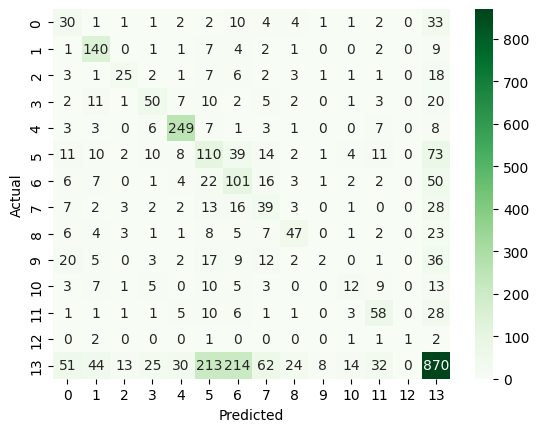

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
# Make predictions on the test set
y_pred_probs = model.predict(doc_vector_test)
y_pred = np.argmax(y_pred_probs, axis=1)


# Generate classification report
target_names = ['class {}'.format(i) for i in range(14)]
print(classification_report(labels_test, y_pred, target_names=target_names))

# Generate confusion matrix
cm = confusion_matrix(labels_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **EXPERIMENT 3: Using Word2Vec insteadd of GloVe**

In [85]:
import gensim.downloader as api
import pandas as pd
import numpy as np

def word2vec(type_data):
    # concatenate the tokens in each list into a single string
    type_data['text'] = type_data['text'].apply(lambda tokens: ' '.join(tokens))

    # loading the pre-trained GloVe model
    model = api.load('word2vec-google-news-300')


    # get the vector representation for each token from the vocabulary
    token_vectors = [model.get_vector(token) for token in type_data['text'] if token in model.key_to_index]
    # create an empty list to store the document vectors
    word_vectors = []

    # compute the document vector for each row and append it to the list
    for text in type_data['text']:
        # get the vector representation for each token that is in the GloVe vocabulary
        token_vectors = [model.get_vector(token) for token in text.split() if token in model.key_to_index]
        
        # get the document vector by averaging the token vectors
        vectors = np.mean(token_vectors, axis=0)
        
        # append the document vector to the list
        word_vectors.append(vectors)

    # add the list of document vectors to the DataFrame
    type_data['word_vector'] = word_vectors
    return type_data


In [86]:
df_train=df_train2.copy()
df_valid=df_valid2.copy()
df_test=df_test2.copy()

In [87]:
df_train.head(10)

,text,labels
0,"[my, favourit, food, is, anyth, i, didnt, have...",13
1,"[now, if, he, doe, off, himself, everyon, will...",13
3,"[to, make, her, feel, threaten]",2
5,"[omg, peyton, isnt, good, enough, to, help, us...",0
6,"[ye, i, heard, abt, the, f, bomb, that, ha, to...",4
7,"[we, need, more, board, and, to, creat, a, bit...",10
9,"[it, might, be, link, to, the, trust, factor, ...",13
10,"[demograph, i, dont, know, anybodi, under, who...",7
12,"[hello, everyon, im, from, toronto, as, well, ...",13
16,"[thank, you, friend]",4


In [88]:
df_train= word2vec(df_train)
df_test= word2vec(df_test)
df_valid= word2vec(df_valid)

[=================================================-] 99.8% 1659.9/1662.8MB downloaded


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [89]:
df_train.head(10)

,text,labels,word_vector
0,my favourit food is anyth i didnt have to cook...,13,"[-0.06288801, 0.026672363, 0.05970982, 0.20523..."
1,now if he doe off himself everyon will think h...,13,"[0.074917264, 0.02271186, 0.024746366, 0.11606..."
3,to make her feel threaten,2,"[-0.0011901855, 0.035446167, 0.017303467, -0.0..."
5,omg peyton isnt good enough to help us in the ...,0,"[0.06249061, 0.028658353, 0.021931576, 0.08583..."
6,ye i heard abt the f bomb that ha to be whi th...,4,"[0.00025634764, 0.040449522, 0.08161621, 0.117..."
7,we need more board and to creat a bit more spa...,10,"[-0.017316546, -0.015182495, -0.017656598, 0.1..."
9,it might be link to the trust factor of your f...,13,"[0.09700521, -0.019299189, 0.076931424, 0.1419..."
10,demograph i dont know anybodi under who ha cab...,7,"[-0.02256557, -0.019042969, 0.073913574, 0.091..."
12,hello everyon im from toronto as well can call...,13,"[-0.024906704, 0.009731361, 0.023412433, 0.116..."
16,thank you friend,4,"[0.009277344, -0.120279945, 0.05517578, 0.1687..."


In [90]:
## Remove some neutral labels 
df_train=removelabelsamples(df_train,3000)
df_train
df_valid=removelabelsamples(df_valid,400)
df_valid





(17007, 3)
(2212, 3)


,text,labels,word_vector
1,you know the answer man you are program to cap...,5,"[0.097724915, 0.009868622, 0.09716225, 0.10499..."
2,ive never been thi sad in my life,8,"[-0.039611816, 0.10493469, 0.011482239, 0.1536..."
3,the economi is heavili control and subsid by t...,5,"[0.012876965, 0.033022925, 0.018247332, 0.0356..."
4,he could have easili taken a real camera from ...,11,"[0.03917643, 0.02396183, -0.0134928385, 0.0802..."
5,thank you for your vote of confid but we stati...,4,"[0.055038452, -0.014231364, -0.0016009012, 0.1..."
...,...,...,...
4046,these are the same thing,13,"[0.06159668, 0.041967772, 0.06992187, 0.099658..."
4038,i think most of us would realli just rather yo...,13,"[0.06023763, 0.003725179, 0.072567746, 0.15198..."
2915,exactli all i hear is about name and name and ...,13,"[0.065589905, -0.008648078, 0.10784912, 0.0376..."
4896,never more have i felt like i come from a brit...,13,"[-0.04752197, -0.007353878, 0.01566925, 0.1589..."


In [91]:
## Drop the null values
df_train.dropna(inplace=True) 
df_valid.dropna(inplace=True)
df_test.dropna(inplace=True)

In [92]:
df_train.head(10)

,text,labels,word_vector
3,to make her feel threaten,2,"[-0.0011901855, 0.035446167, 0.017303467, -0.0..."
5,omg peyton isnt good enough to help us in the ...,0,"[0.06249061, 0.028658353, 0.021931576, 0.08583..."
6,ye i heard abt the f bomb that ha to be whi th...,4,"[0.00025634764, 0.040449522, 0.08161621, 0.117..."
7,we need more board and to creat a bit more spa...,10,"[-0.017316546, -0.015182495, -0.017656598, 0.1..."
10,demograph i dont know anybodi under who ha cab...,7,"[-0.02256557, -0.019042969, 0.073913574, 0.091..."
16,thank you friend,4,"[0.009277344, -0.120279945, 0.05517578, 0.1687..."
19,mayb that what happen to the great white at ho...,7,"[-0.038330078, 0.03656616, 0.0030395507, 0.101..."
28,super thank,4,"[-0.07543945, -0.0063476562, 0.013916016, 0.10..."
31,all sound possibl except the key i cant see ho...,7,"[0.052141976, 0.0016559152, 0.037501615, 0.078..."
34,what doe fptp have to do with the referendum,7,"[0.042027064, -0.0018833706, -0.032802038, 0.1..."


In [93]:
num_nan = df_test['labels'].isnull().sum()
if num_nan > 0:
    print(f'There are {num_nan} NaN values in the "labels" column.')
else:
    print('No NaN values found in the "labels" column.')

No NaN values found in the "labels" column.


In [94]:
word_vector_train = np.array(df_train['word_vector'].to_list())
word_vector_test = np.array(df_test['word_vector'].to_list())
word_vector_val= np.array(df_valid['word_vector'].to_list())

labels_train = np.array(df_train['labels'])
labels_test = np.array(df_test['labels'])
labels_val = np.array(df_valid['labels'])


In [95]:
word_vector_train = word_vector_train.reshape(-1, 1, 300)
word_vector_val = word_vector_val.reshape(-1, 1, 300)
wordvector_test = word_vector_test.reshape(-1, 1, 300)

In [96]:
word_vector_val.shape

(2208, 1, 300)

In [97]:
labels_val.shape

(2208,)

In [98]:
labels_train

array([ 2,  0,  4, ..., 13, 13, 13])

In [99]:
labels_test.shape

(3361,)

## Training LSTM model with Word2Vec vectors

In [100]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from keras.utils import to_categorical



# Define the model architecture
model = Sequential()
#model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
model.add(LSTM(units=64, return_sequences=True, input_shape=(1,300))) 
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=14, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(word_vector_train, labels_train, epochs=40, batch_size=128, validation_data=(word_vector_val, labels_val))

# Display the training accuracy for each epoch

train_acc = history.history['accuracy']
last_train_acc = train_acc[-1]
print("Training accuracy after the last epoch = {:.2f}%".format(last_train_acc*100))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(wordvector_test, labels_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy*100)


Epoch 1/40
133/133 [==============================] - 5s 11ms/step - loss: 2.3912 - accuracy: 0.2345 - val_loss: 2.1018 - val_accuracy: 0.3238
Epoch 2/40
133/133 [==============================] - 1s 6ms/step - loss: 2.0293 - accuracy: 0.3441 - val_loss: 1.8837 - val_accuracy: 0.3759
Epoch 3/40
133/133 [==============================] - 1s 6ms/step - loss: 1.8688 - accuracy: 0.3824 - val_loss: 1.7824 - val_accuracy: 0.4198
Epoch 4/40
133/133 [==============================] - 1s 6ms/step - loss: 1.7759 - accuracy: 0.4197 - val_loss: 1.7059 - val_accuracy: 0.4370
Epoch 5/40
133/133 [==============================] - 1s 6ms/step - loss: 1.7148 - accuracy: 0.4431 - val_loss: 1.6665 - val_accuracy: 0.4565
Epoch 6/40
133/133 [==============================] - 1s 6ms/step - loss: 1.6708 - accuracy: 0.4576 - val_loss: 1.6344 - val_accuracy: 0.4592
Epoch 7/40
133/133 [==============================] - 1s 6ms/step - loss: 1.6378 - accuracy: 0.4694 - val_loss: 1.6230 - val_accuracy: 0.4651
Epoch

## RESULT: LSTM with Word2Vec embedding technique

    Training accuracy= 55%
    Validation accuracy= 50%
    Test accuracy= 51%

# **EXPERIMENTATION 4 -Hyperparameters Tuning**

 


## Bidirectional LSTM


In [101]:
df_train=train_wd.copy()
df_valid=valid_wd.copy()
df_test=test_wd.copy()
### Using the data from pre-processing 2 and gloVe vector embedding

In [102]:
df_train.head(10)

,text,labels,doc_vector
3,to make her feel threaten,2,"[-0.018442404, 0.1159202, -0.36968222, -0.2765..."
5,omg peyton isnt good enough to help us in the ...,0,"[-0.0755232, 0.14430313, -0.1358438, -0.100735..."
6,ye i heard abt the f bomb that ha to be whi th...,4,"[-0.10028123, 0.030625658, -0.13151038, -0.205..."
7,we need more board and to creat a bit more spa...,10,"[-0.19019182, 0.0022973474, -0.048756514, -0.2..."
10,demograph i dont know anybodi under who ha cab...,7,"[-0.32413742, 0.009428574, -0.012045143, 0.090..."
16,thank you friend,4,"[-0.19399698, -0.067019664, -0.14435233, -0.29..."
19,mayb that what happen to the great white at ho...,7,"[0.016071593, 0.16011031, -0.111054525, -0.108..."
28,super thank,4,"[-0.045185503, 0.45704502, 0.1171965, -0.32305..."
31,all sound possibl except the key i cant see ho...,7,"[-0.11225088, 0.073751256, -0.1441322, -0.1621..."
34,what doe fptp have to do with the referendum,7,"[-0.090088435, 0.157253, -0.16659781, 0.003244..."


In [103]:
print(df_train['doc_vector'].isnull().sum())

0


In [104]:
doc_vector_train = np.array(df_train['doc_vector'].to_list())
doc_vector_test = np.array(df_test['doc_vector'].to_list())
doc_vector_val= np.array(df_valid['doc_vector'].to_list())


labels_train = np.array(df_train['labels'])
labels_test = np.array(df_test['labels'])
labels_val = np.array(df_valid['labels'])

doc_vector_train = doc_vector_train.reshape(-1, 1, 300)
doc_vector_val = doc_vector_val.reshape(-1, 1, 300)
doc_vector_test = doc_vector_test.reshape(-1, 1, 300)

doc_vector_train.shape
labels_train.shape

(16991,)

In [105]:
doc_vector_train.shape

(16991, 1, 300)

In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Bidirectional

# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(1, 300)))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.2))
model.add(Dense(units=14, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(doc_vector_train, labels_train, epochs=20, batch_size=128, validation_data=(doc_vector_val, labels_val))

# Display the training accuracy for each epoch
train_acc = history.history['accuracy']
for epoch, acc in enumerate(train_acc):
    print("Epoch {}: Training accuracy = {:.2f}%".format(epoch+1, acc*100))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(doc_vector_test, labels_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



Epoch 1/20
133/133 [==============================] - 11s 30ms/step - loss: 2.2362 - accuracy: 0.2711 - val_loss: 1.9102 - val_accuracy: 0.3821
Epoch 2/20
133/133 [==============================] - 1s 8ms/step - loss: 1.8368 - accuracy: 0.4018 - val_loss: 1.7256 - val_accuracy: 0.4319
Epoch 3/20
133/133 [==============================] - 1s 9ms/step - loss: 1.7074 - accuracy: 0.4433 - val_loss: 1.6614 - val_accuracy: 0.4450
Epoch 4/20
133/133 [==============================] - 1s 8ms/step - loss: 1.6464 - accuracy: 0.4645 - val_loss: 1.6184 - val_accuracy: 0.4663
Epoch 5/20
133/133 [==============================] - 1s 9ms/step - loss: 1.6102 - accuracy: 0.4771 - val_loss: 1.6044 - val_accuracy: 0.4726
Epoch 6/20
133/133 [==============================] - 1s 9ms/step - loss: 1.5845 - accuracy: 0.4847 - val_loss: 1.5827 - val_accuracy: 0.4794
Epoch 7/20
133/133 [==============================] - 1s 8ms/step - loss: 1.5610 - accuracy: 0.4930 - val_loss: 1.5668 - val_accuracy: 0.4916
Epoc

## LSTM with Early Stopping(Regularization technique)

In [107]:
df_train=train_wd.copy()
df_valid=valid_wd.copy()
df_test=test_wd.copy()

In [108]:
doc_vector_train = np.array(df_train['doc_vector'].to_list())
doc_vector_test = np.array(df_test['doc_vector'].to_list())
doc_vector_val= np.array(df_valid['doc_vector'].to_list())


labels_train = np.array(df_train['labels'])
labels_test = np.array(df_test['labels'])
labels_val = np.array(df_valid['labels'])

doc_vector_train = doc_vector_train.reshape(-1, 1, 300)
doc_vector_val = doc_vector_val.reshape(-1, 1, 300)
doc_vector_test = doc_vector_test.reshape(-1, 1, 300)

doc_vector_train.shape


(16991, 1, 300)

In [109]:
labels_train.shape

(16991,)

Changed the number of epochs, batch-size=64

In [110]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Bidirectional

# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(1, 300)))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.2))
model.add(Dense(units=14, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(doc_vector_train, labels_train, epochs=40, batch_size=64, validation_data=(doc_vector_val, labels_val))

# Display the training accuracy for each epoch
train_acc = history.history['accuracy']
for epoch, acc in enumerate(train_acc):
    print("Epoch {}: Training accuracy = {:.2f}%".format(epoch+1, acc*100))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(doc_vector_test, labels_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



Epoch 1/40
266/266 [==============================] - 10s 13ms/step - loss: 2.1027 - accuracy: 0.3125 - val_loss: 1.8014 - val_accuracy: 0.4160
Epoch 2/40
266/266 [==============================] - 3s 11ms/step - loss: 1.7593 - accuracy: 0.4270 - val_loss: 1.6614 - val_accuracy: 0.4500
Epoch 3/40
266/266 [==============================] - 2s 8ms/step - loss: 1.6596 - accuracy: 0.4604 - val_loss: 1.6109 - val_accuracy: 0.4749
Epoch 4/40
266/266 [==============================] - 2s 8ms/step - loss: 1.6088 - accuracy: 0.4767 - val_loss: 1.5963 - val_accuracy: 0.4826
Epoch 5/40
266/266 [==============================] - 2s 8ms/step - loss: 1.5717 - accuracy: 0.4913 - val_loss: 1.5703 - val_accuracy: 0.4907
Epoch 6/40
266/266 [==============================] - 2s 8ms/step - loss: 1.5427 - accuracy: 0.4973 - val_loss: 1.5631 - val_accuracy: 0.4907
Epoch 7/40
266/266 [==============================] - 3s 10ms/step - loss: 1.5268 - accuracy: 0.5019 - val_loss: 1.5462 - val_accuracy: 0.4966
Ep

## OBSERVATION: Lower batch size is making the model overfit

In [136]:
df_train=train_wd.copy()
df_valid=valid_wd.copy()
df_test=test_wd.copy()

In [137]:
doc_vector_train = np.array(df_train['doc_vector'].to_list())
doc_vector_test = np.array(df_test['doc_vector'].to_list())
doc_vector_val= np.array(df_valid['doc_vector'].to_list())


labels_train = np.array(df_train['labels'])
labels_test = np.array(df_test['labels'])
labels_val = np.array(df_valid['labels'])

doc_vector_train = doc_vector_train.reshape(-1, 1, 300)
doc_vector_val = doc_vector_val.reshape(-1, 1, 300)
doc_vector_test = doc_vector_test.reshape(-1, 1, 300)

doc_vector_train.shape


(16991, 1, 300)

In [138]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(1,300)))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.2))
model.add(Dense(units=14, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(doc_vector_train, labels_train, epochs=40, batch_size=128, validation_data=(doc_vector_val, labels_val), callbacks=[early_stop])

# Display the training accuracy for each epoch
train_acc = history.history['accuracy']
for epoch, acc in enumerate(train_acc):
    print("Epoch {}: Training accuracy = {:.2f}%".format(epoch+1, acc*100))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(doc_vector_test, labels_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/40
133/133 [==============================] - 17s 19ms/step - loss: 2.2243 - accuracy: 0.2821 - val_loss: 1.8980 - val_accuracy: 0.3762
Epoch 2/40
133/133 [==============================] - 2s 12ms/step - loss: 1.8344 - accuracy: 0.3998 - val_loss: 1.7242 - val_accuracy: 0.4405
Epoch 3/40
133/133 [==============================] - 1s 10ms/step - loss: 1.7136 - accuracy: 0.4428 - val_loss: 1.6544 - val_accuracy: 0.4622
Epoch 4/40
133/133 [==============================] - 1s 9ms/step - loss: 1.6499 - accuracy: 0.4617 - val_loss: 1.6194 - val_accuracy: 0.4789
Epoch 5/40
133/133 [==============================] - 1s 8ms/step - loss: 1.6149 - accuracy: 0.4730 - val_loss: 1.5906 - val_accuracy: 0.4785
Epoch 6/40
133/133 [==============================] - 1s 8ms/step - loss: 1.5870 - accuracy: 0.4866 - val_loss: 1.5891 - val_accuracy: 0.4839
Epoch 7/40
133/133 [==============================] - 1s 8ms/step - loss: 1.5678 - accuracy: 0.4896 - val_loss: 1.5851 - val_accuracy: 0.4862
Ep

    Training accuracy= 55%
    Test accuracy= 51%
    Validation accuracy= 51%

# Classification Report and Confusion matrix

106/106 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

     class 0       0.22      0.37      0.28        92
     class 1       0.62      0.81      0.70       168
     class 2       0.58      0.27      0.37        71
     class 3       0.42      0.47      0.44       114
     class 4       0.79      0.88      0.83       288
     class 5       0.25      0.39      0.31       295
     class 6       0.26      0.44      0.33       215
     class 7       0.26      0.30      0.28       116
     class 8       0.44      0.44      0.44       108
     class 9       0.12      0.04      0.06       109
    class 10       0.34      0.15      0.21        68
    class 11       0.41      0.56      0.47       116
    class 12       1.00      0.12      0.22         8
    class 13       0.71      0.55      0.62      1600

    accuracy                           0.52      3368
   macro avg       0.46      0.41      0.40      3368
weighted avg       0.56  

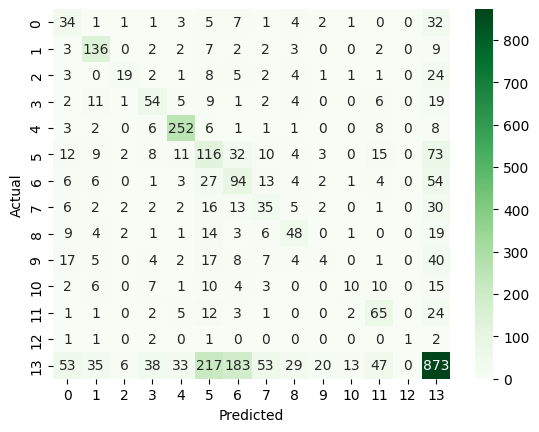

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
# Make predictions on the test set
y_pred_probs = model.predict(doc_vector_test)
y_pred = np.argmax(y_pred_probs, axis=1)


# Generate classification report
target_names = ['class {}'.format(i) for i in range(14)]
print(classification_report(labels_test, y_pred, target_names=target_names))

# Generate confusion matrix
cm = confusion_matrix(labels_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
